## Exercise 2
In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs= to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [1]:
import tensorflow as tf
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab mnist.npz from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/mnist.npz"

11493376/11490434 [==============================] - 3s 0us/step


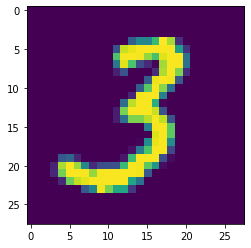

In [2]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)

im = np.random.randint(0, 1000)
plt.imshow(x_train[im])

In [18]:
# GRADED FUNCTION: train_mnist
def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    
    class myCallback(tf.keras.callbacks.Callback):
      # YOUR CODE SHOULD START HERE
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>0.99):
                print("\nReached 85% accuracy so cancelling training!")
                self.model.stop_training = True
      # YOUR CODE SHOULD END HERE
    callbacks = myCallback()
    
    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)
    # Normalize your dataset
    # YOUR CODE SHOULD START HERE
    x_train = x_train/255.0
    x_test = x_test/255.0

    # YOUR CODE SHOULD END HERE
    model = tf.keras.models.Sequential([
        # YOUR CODE SHOULD START HERE
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        # YOUR CODE SHOULD END HERE
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting
    history = model.fit(x_train, y_train, epochs=5, callbacks=[callbacks])
    # model fitting
    return history.epoch, history.history['accuracy'][-1], model

In [19]:
train_mnist()

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2025 - accuracy: 0.9395
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0819 - accuracy: 0.9746
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0525 - accuracy: 0.9835
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0367 - accuracy: 0.9884
Epoch 5/5
1875/1875 [==============================] - ETA: 0s - loss: 0.0289 - accuracy: 0.9905
Reached 85% accuracy so cancelling training!
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0289 - accuracy: 0.9905


([0, 1, 2, 3, 4],
 0.9904500246047974,
 <tensorflow.python.keras.engine.sequential.Sequential at 0x2732a828fa0>)

In [20]:
hist, acc, model = train_mnist()

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2016 - accuracy: 0.9402
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0803 - accuracy: 0.9756
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0516 - accuracy: 0.9841
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0358 - accuracy: 0.9888
Epoch 5/5
1875/1875 [==============================] - ETA: 0s - loss: 0.0259 - accuracy: 0.9915
Reached 85% accuracy so cancelling training!
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0259 - accuracy: 0.9915


In [21]:
(x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 14.2891 - accuracy: 0.9799


[14.289052963256836, 0.9799000024795532]

## Use our own image

In [29]:
!git clone https://gist.github.com/8409b3feec20f159d8a50b0a811d3bca.git

'git' 不是內部或外部命令、可執行的程式或批次檔。


In [30]:
! mv 8409b3feec20f159d8a50b0a811d3bca/draw.py ./

'mv' 不是內部或外部命令、可執行的程式或批次檔。


In [47]:
from draw import *

ModuleNotFoundError: No module named 'draw'

In [40]:
draw()

NameError: name 'draw' is not defined

In [ ]:
from PIL import Image

In [ ]:
im = Image.open("drawing.png").convert('LA')

In [ ]:
imag_gs = np.array(im)[:, :, 1]
resized_image = cv2.resize(imag_gs, (28, 28))
input_image = resized_image.reshape(1, 28, 28)

In [ ]:
# resized_image = cv2.resize(np.array(im), (28, 28))
# # gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
model.predict(input_image)

In [ ]:
plt.imshow(resized_image)

In [ ]:
#@title
# GRADED FUNCTION: train_mnist
def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    # YOUR CODE SHOULD START HERE
    class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.99):
          print("\nReached 99% accuracy so cancelling training!")
          self.model.stop_training = True

    callbacks = myCallback()
    # YOUR CODE SHOULD END HERE
    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)
    # YOUR CODE SHOULD START HERE
    x_train = x_train / 255.0
    x_test = x_test / 255.0

    # YOUR CODE SHOULD END HERE
    model = tf.keras.models.Sequential([
        # YOUR CODE SHOULD START HERE
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        # YOUR CODE SHOULD END HERE
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])
    
    # model fitting
    history = model.fit(x_train, y_train, epochs=5, callbacks=[callbacks])
    # model fitting
    return history.epoch, history.history['acc'][-1], model